# Classification Tree for Grocery Store

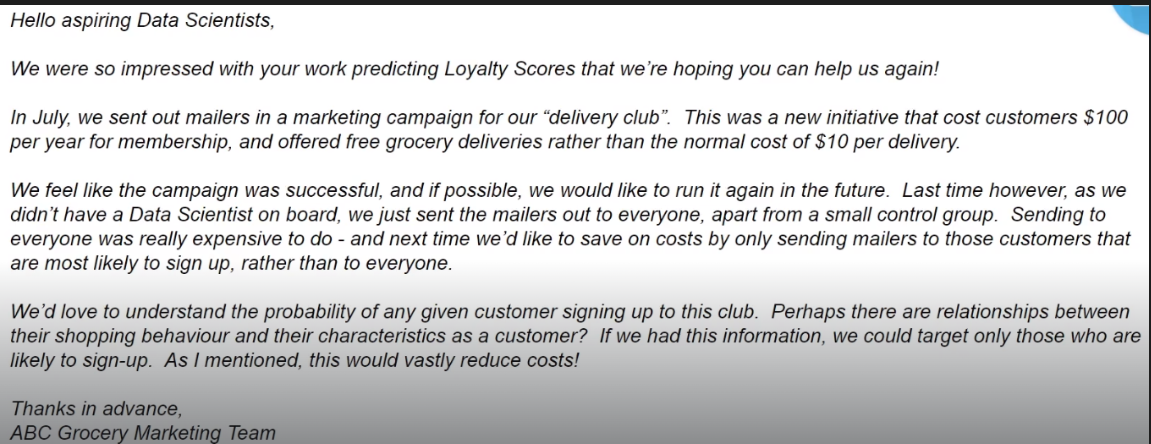

In [49]:
# import required packages
import pandas as pd
import pickle
# import required packages
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [20]:
# import, learning to import using pickle files
data_for_model = pickle.load(open('Saved_files/abc_classification_modelling.p','rb'))

# we dont really need the id for the model
data_for_model.drop('customer_id', axis=1, inplace=True)
print(data_for_model.shape)
data_for_model.head()


(860, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,1,3.02,F,0.63,1566.35,182,30,5,52.211667


In [21]:
# shuffle data just in case it either came in in some order
# or we accidentally ordered it which will cause model to error
data_for_model = shuffle(data_for_model,random_state=42)
print(data_for_model.shape)
data_for_model.head()

(860, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [22]:
# class balance
data_for_model['signup_flag'].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [23]:
######################################################
# deal with missing values
######################################################
data_for_model.isna().sum()
# small number of columns with missing values, lets not impute and just drop 
# but noted 

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [24]:
# "any" meaning drop the whole row if any one cell is empty
data_for_model.dropna(how="any", inplace=True)
print(data_for_model.shape)
data_for_model.head()

(847, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [25]:
######################################################
# deal with outliers
######################################################
outlier_investigation = data_for_model.describe()
print(outlier_investigation)
# some outliers in distance_from_store, total_sales, total_items
# all others did not spark any issues

       signup_flag  distance_from_store  credit_score  total_sales  \
count   847.000000           847.000000    847.000000   847.000000   
mean      0.304604             2.614545      0.597521   968.166411   
std       0.460512            14.397590      0.102264  1073.647531   
min       0.000000             0.000000      0.260000     2.090000   
25%       0.000000             0.730000      0.530000   383.940000   
50%       0.000000             1.640000      0.590000   691.640000   
75%       1.000000             2.920000      0.670000  1121.530000   
max       1.000000           400.970000      0.880000  7372.060000   

       total_items  transaction_count  product_area_count  \
count   847.000000         847.000000          847.000000   
mean    143.877214          22.214876            4.177096   
std     125.342694          11.721699            0.920887   
min       1.000000           1.000000            1.000000   
25%      77.000000          16.000000            4.000000   
50%

In [26]:
######################################################
# split input variables and output variables
######################################################
# we dont want the output in the input dataframe
X = data_for_model.drop(['signup_flag'], axis=1)
Y = data_for_model['signup_flag']

In [27]:
######################################################
# split out training and test sets
######################################################
# Regression model 
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42,
                                                    stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(677, 8)
(170, 8)
(677,)
(170,)


In [28]:
######################################################
# deal with categorical variables
######################################################
# gender
categorical_vars = ["gender"]
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")# array is easier to use and viduallize 
# avoid dummy variable trap

In [29]:
# fit and transform on the training and only the transform on the test
# we do this because we want the encoding rules to be learned from the 
# training data and then applied to the new data 
X_train_encoded_vars_array = one_hot_encoder.fit_transform(x_train[categorical_vars])
X_test_encoded_vars_array = one_hot_encoder.transform(x_test[categorical_vars])
print(X_train_encoded_vars_array.shape)
print(X_test_encoded_vars_array.shape)

(677, 1)
(170, 1)


c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

In [31]:
X_train_encoded_vars_array = pd.DataFrame(X_train_encoded_vars_array,
                               columns=encoder_feature_names)
x_train = pd.concat([x_train.reset_index(drop=True),
                   X_train_encoded_vars_array.reset_index(drop=True)], 
                   axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_train.drop(categorical_vars, axis=1,inplace=True)
print(x_train.shape)
print(x_train.head())

(677, 8)
   distance_from_store  credit_score  total_sales  total_items  \
0                 1.22          0.60       636.51          123   
1                 0.86          0.56      1141.28          112   
2                 1.23          0.79      1207.42          210   
3                 1.04          0.40        78.18           11   
4                 0.07          0.62       740.51           94   

   transaction_count  product_area_count  average_basket_value  gender_M  
0                 22                   5             28.932273       0.0  
1                 21                   5             54.346667       1.0  
2                 26                   4             46.439231       1.0  
3                  3                   2             26.060000       1.0  
4                 24                   5             30.854583       1.0  


In [32]:
X_test_encoded_vars_array = pd.DataFrame(X_test_encoded_vars_array,
                               columns=encoder_feature_names)
x_test = pd.concat([x_test.reset_index(drop=True),
                   X_test_encoded_vars_array.reset_index(drop=True)], axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_test.drop(categorical_vars, axis=1,inplace=True)
print(x_test.shape)
print(x_test.head())

(170, 8)
   distance_from_store  credit_score  total_sales  total_items  \
0                 1.92          0.64      1283.76          191   
1                 5.38          0.64      5180.71          662   
2                 3.18          0.67      2482.50          288   
3                 1.59          0.50       319.37           85   
4                 2.73          0.36      1146.93          211   

   transaction_count  product_area_count  average_basket_value  gender_M  
0                 30                   5             42.792000       0.0  
1                 56                   5             92.512679       0.0  
2                 30                   5             82.750000       0.0  
3                 17                   5             18.786471       1.0  
4                 24                   3             47.788750       0.0  


In [33]:
######################################################
# model train
######################################################
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [35]:
######################################################
# model assessment
######################################################
# Predict on the Test Set 
y_pred_class = clf.predict(x_test)
y_pred_prob = clf.predict_proba(x_test)[:,1]

In [37]:
# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_class)
print(conf_matrix)

[[112   6]
 [  6  46]]


C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_10048/2987787315.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


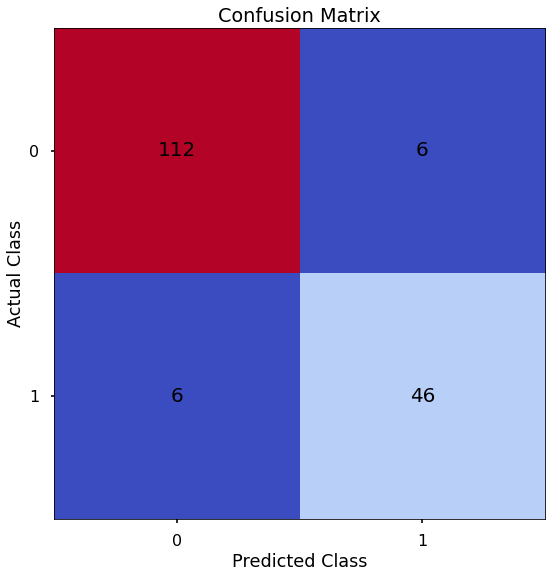

In [40]:
plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class") 
plt.xlabel("Predicted Class")
# dont hve to go through just understand and look up if need to
for (i, j), corr_value in np.ndenumerate (conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show() 

In [41]:
accuracy_score(y_test,y_pred_class)

0.9294117647058824

In [42]:
precision_score(y_test,y_pred_class)

0.8846153846153846

In [43]:
recall_score(y_test,y_pred_class)

0.8846153846153846

In [44]:
f1_score(y_test,y_pred_class)

0.8846153846153846

In [45]:
# finding the best max depth
# squeeze some more percentages gain by changing our initial
# guess of 5 depth to a more accurate deptch level
max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=depth,random_state=42)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = f1_score(y_test,y_pred)#data is not perfectly balanced so should use f1
    accuracy_scores.append(accuracy)
print(accuracy_scores)

[0.6857142857142856, 0.7741935483870966, 0.8347826086956522, 0.7659574468085107, 0.8846153846153846, 0.9056603773584906, 0.9038461538461539, 0.8846153846153846, 0.9245283018867925, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953, 0.8952380952380953]


In [46]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]
print(optimal_depth)

9


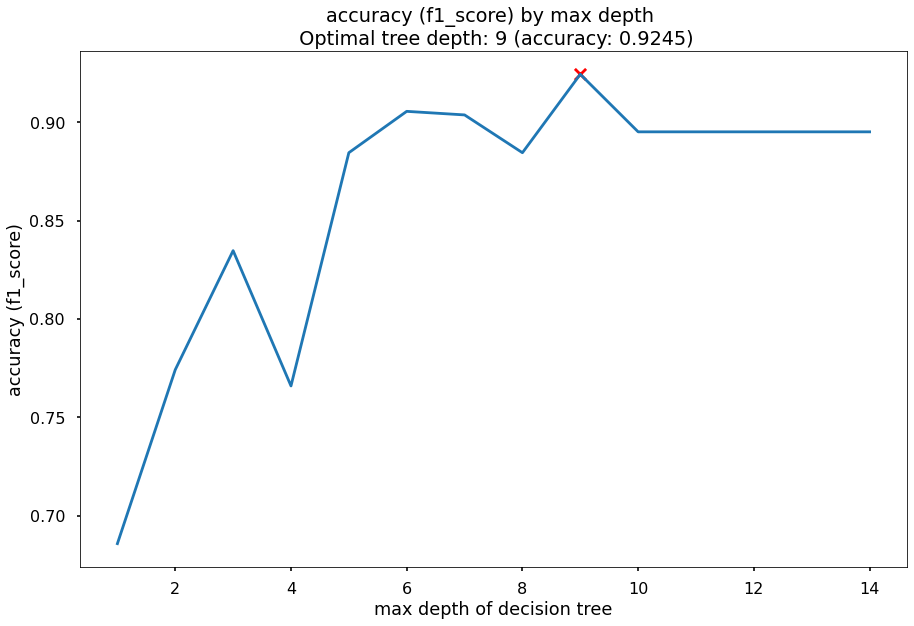

In [47]:
# plot of max depths
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth,
            max_accuracy,
            marker='x',
            color='red')
plt.title(f'accuracy (f1_score) by max depth \n Optimal tree depth: {optimal_depth} (accuracy: {round(max_accuracy,4)})')
plt.xlabel('max depth of decision tree')
plt.ylabel('accuracy (f1_score)')
plt.tight_layout()
plt.show()
# it suggests 9 


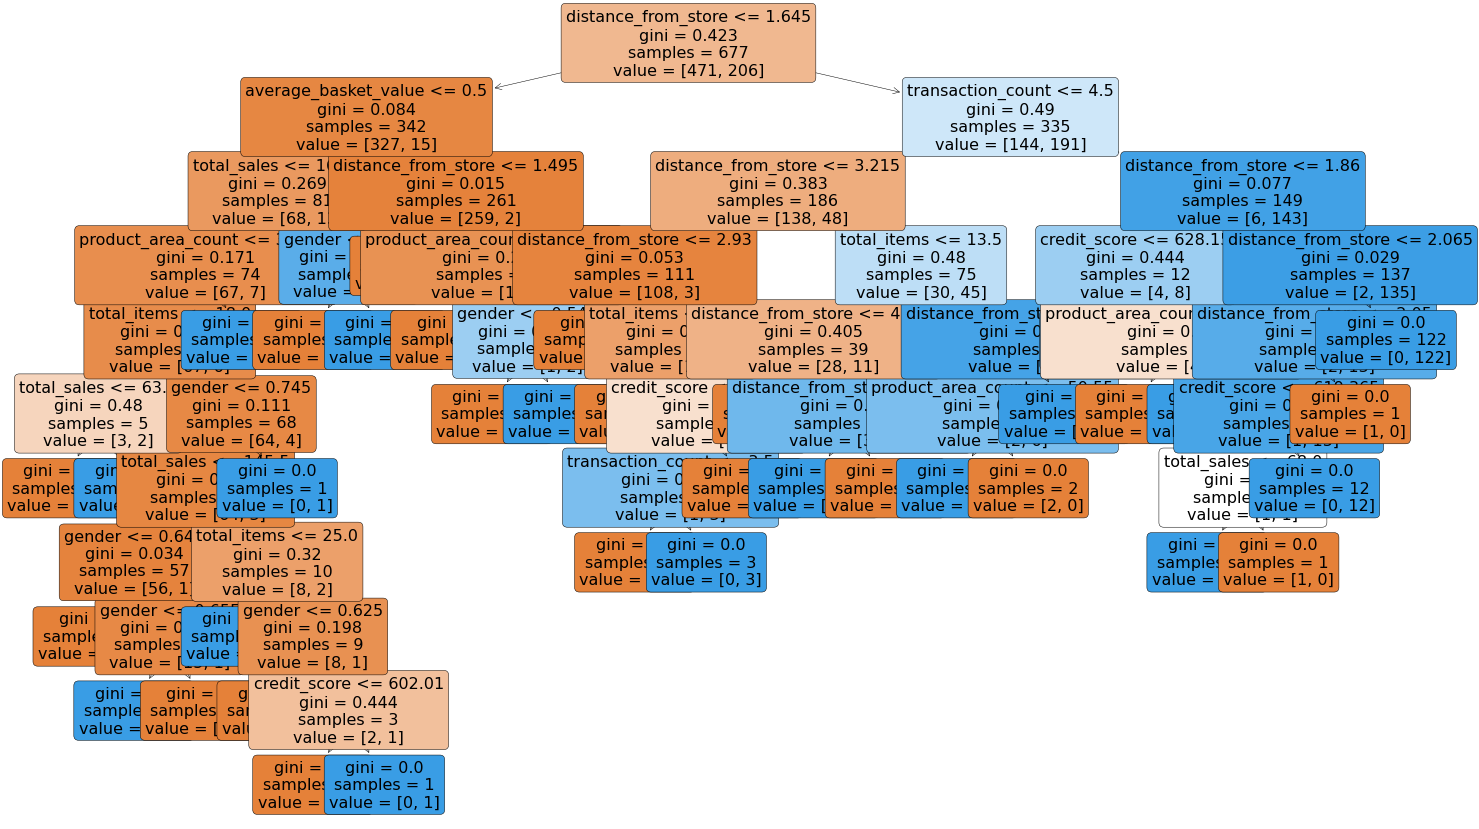

In [50]:
# plot our model
# plot our decision tree
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names=X.columns,
                 filled=True,
                 rounded = True,
                 fontsize=16)

In [ ]:
# at 9 it would be chaotic
# 